In [598]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import text

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
import umap

import os

In [545]:
df = pd.read_csv('df_modelisation.csv')
df.payment_installments.apply(lambda x: 1 if x==1 else 0)
df.nb_char_comment.apply(lambda x: 0 if x==0 else 1)
df.nb_order.apply(lambda x: 1 if x==1 else 0)
df.nb_product.apply(lambda x: 1 if x==1 else 0)
df = df.drop(columns=['nb_items','nb_product','nb_sellers'])

## K-Prototypes

In [546]:
# cat_var = df.select_dtypes('object').columns
# num_var = df.select_dtypes('number').columns

# scaler_transformer = StandardScaler()
# log_transformer = FunctionTransformer(func=np.log1p)
# abs_transformer = FunctionTransformer(func=np.abs)

# num_pipe = Pipeline([
#         ('log_num', log_transformer),
#         ('abs_num', abs_transformer),
#         ('num', scaler_transformer),
# ])

# encoder = ColumnTransformer(
#     transformers=[
#         ('num', num_pipe, num_var)
#     ], 
#     remainder='passthrough'
# )

# pipe = Pipeline([
#     ('enc', encoder),
# ])

# array_proto = pipe.fit_transform(df)
# df_proto = pd.DataFrame(array_proto)
# n_cols = df_proto.shape[1]

In [425]:
# #Choosing optimal K value
# cost = []
# for num_clusters in list(range(7)):
#     kproto = KPrototypes(n_clusters=num_clusters, init='Huang',n_jobs=-1, max_iter=5,n_init=5) 
#     kproto.fit_predict(df_proto, categorical=[n_cols-2,n_cols-1])
#     cost.append(kproto.cost_)

In [568]:
# plt.plot(cost)
# plt.title('Elbow method')
# plt.xlabel('K')
# plt.ylabel('cost')
# plt.show()

In [496]:
# # Running K-Prototype clustering
# kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42,max_iter=10, n_init=6,n_jobs=-1,gamma=.25) 
# clusters = kproto.fit_predict(df_proto, categorical=[n_cols-2,n_cols-1])

In [547]:
cat_var = df.select_dtypes('object').columns
num_var = df.select_dtypes('number').columns

cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
log_transformer = FunctionTransformer(func=np.log1p)
abs_transformer = FunctionTransformer(func=np.abs)
scaler_transformer = StandardScaler()

model_pca = PCA(n_components=0.99)

num_pipe = Pipeline([
        ('log_num', log_transformer),
        ('abs_num', abs_transformer),
        ('num', scaler_transformer),
])

encoder = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_var),
        ('num', num_pipe, num_var),
    ], 
    remainder='passthrough'
)

pipe = Pipeline([
    ('enc', encoder),
    ('pca', model_pca),
])

array_pca = pipe.fit_transform(df)
df_pca = pd.DataFrame(array_pca)

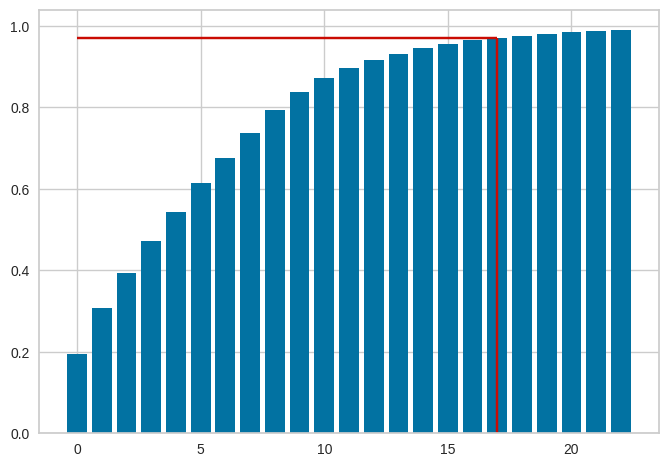

In [548]:
variances = pipe['pca'].explained_variance_ratio_
rate = 0.97
meilleur_dims = np.argmax(np.cumsum(variances) > rate)
n_dims = df_pca.shape[1]

plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(rate, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, rate, colors='r')
plt.show()

In [566]:
# longueur = len(df_pca.columns)
# nb_figure = 1

# plt.figure(figsize=(60,60))

# for i in range(longueur):
#     for j in range(longueur):
#         plt.subplot(longueur, longueur, nb_figure)
#         sns.scatterplot(x=df_pca[i], y=df_pca[j], c=clusters, cmap='viridis')

#         nb_figure += 1

# plt.show()


In [567]:
# sns.scatterplot(x=df_transform[0], y=df_transform[1], c=clusters,cmap='viridis')
# plt.show()

In [569]:
# for x in range(66,360,66):
#     for y in range(0,360,66):
#         visu3D(x,y)

In [570]:
# #Visualize K-Prototype clustering on the PCA projected Data
# df['cluster']=clusters
# print(df['cluster'].value_counts())
# sns.pairplot(df,hue='cluster',palette='Dark2',diag_kind='kde')

## **K-Means**

/home/apprenant/miniconda3/envs/env_analyse/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/env_analyse/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/env_analyse/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/env_analyse/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=11, random_state=42), k=(2, 12))

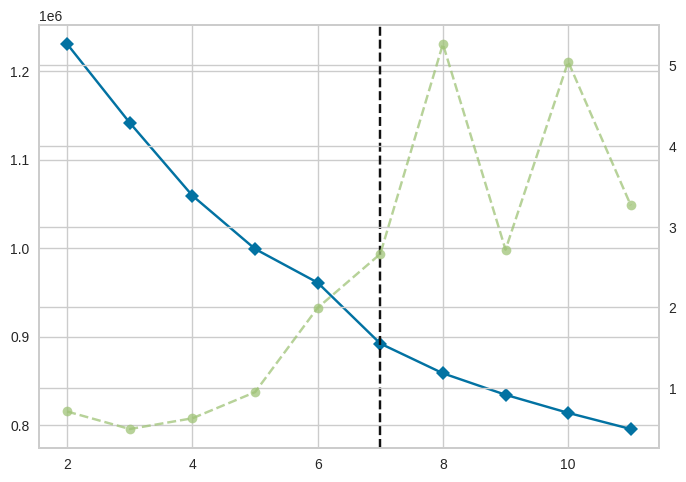

In [549]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,12))
visualizer.fit(df_pca)

In [561]:
kMeans = KMeans(n_clusters=3, init='k-means++', n_init='warn', max_iter=50, tol=0.0001, copy_x=True, algorithm='lloyd')
clusters = kMeans.fit_predict(df_pca)

/home/apprenant/miniconda3/envs/env_analyse/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


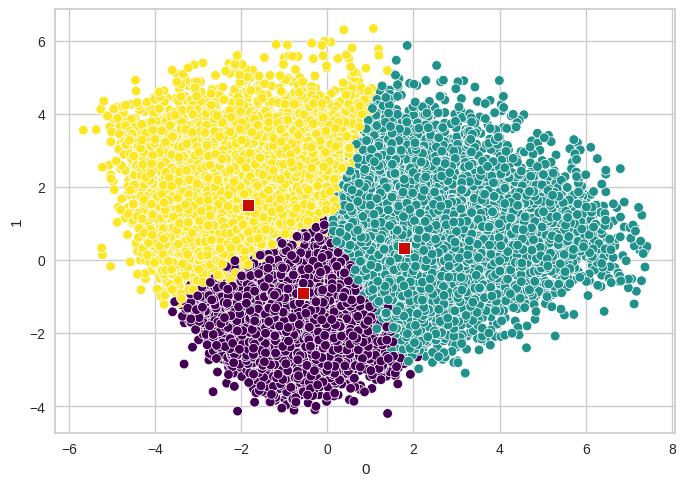

In [562]:
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=clusters, cmap='viridis')
sns.scatterplot(x=kMeans.cluster_centers_[:,0], y=kMeans.cluster_centers_[:,1], s=80, c='r', marker='s')
plt.show()

In [ ]:
def visu3D(x,y):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(projection='3d')
    scatter = ax.scatter(df_pca[0], df_pca[1], df_pca[2], s=2, c=clusters, cmap='viridis')
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.view_init(x, y)
    plt.show()

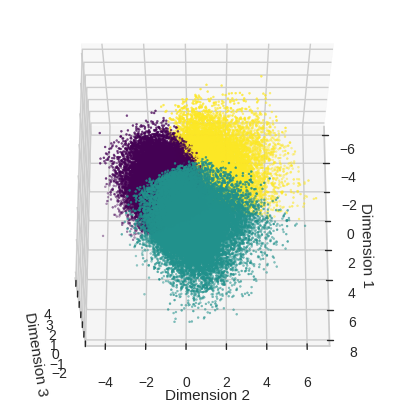

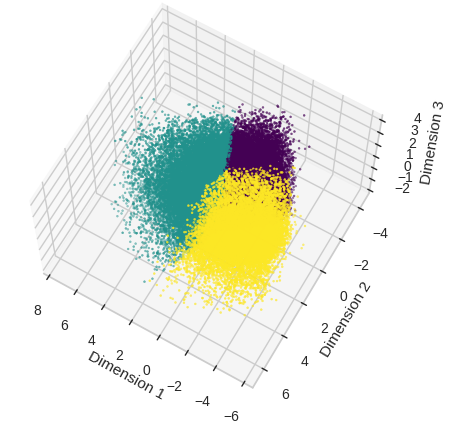

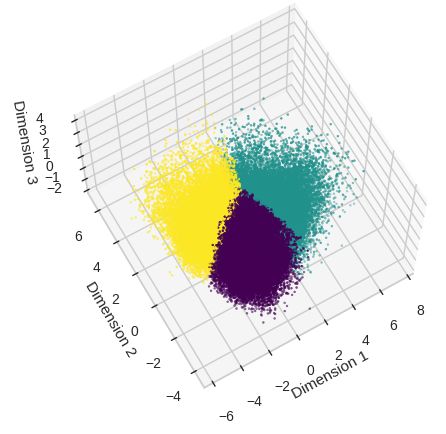

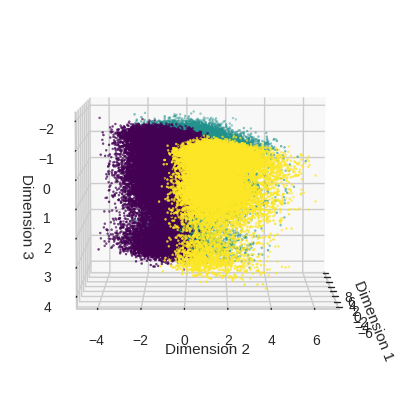

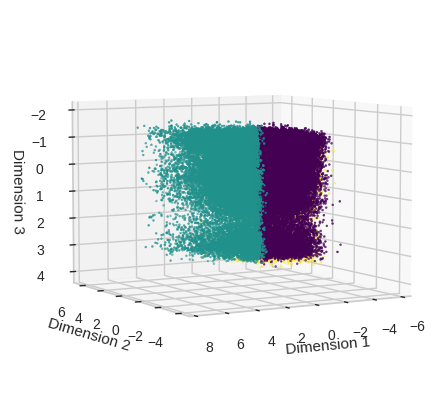

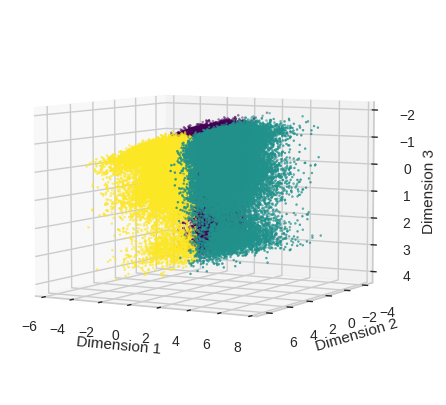

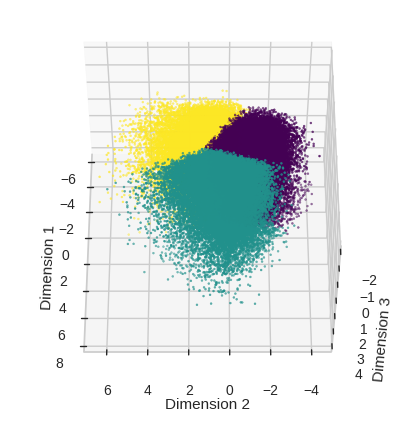

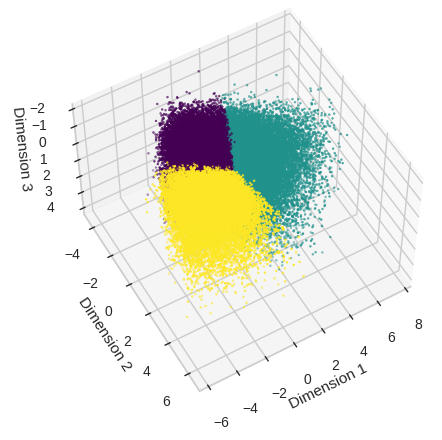

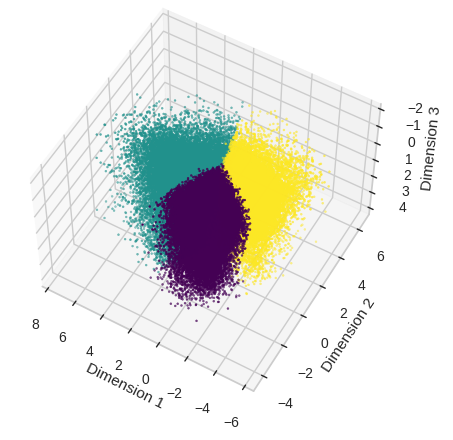

In [563]:
for x in range(66,360,120):
    for y in range(0,360,120):
        visu3D(x,y)

In [575]:
tsne2 = TSNE(n_components=2, init='pca', random_state=0, n_jobs=-1)
array_tsne2 = tsne2.fit_transform(df_transform)

In [576]:
columns = ['DIM' + str(c) for c in range(1, array_tsne2.shape[1]+1, 1)]
df_tsne2 = pd.DataFrame(array_tsne2, index=df.index, columns=columns)
df_tsne2.head()

,DIM1,DIM2
0,50.120747,-16.419088
1,-74.826195,-30.813725
2,40.863380,58.373055
3,-10.087140,-67.770256
4,25.696749,44.404545


<AxesSubplot:xlabel='DIM1', ylabel='DIM2'>

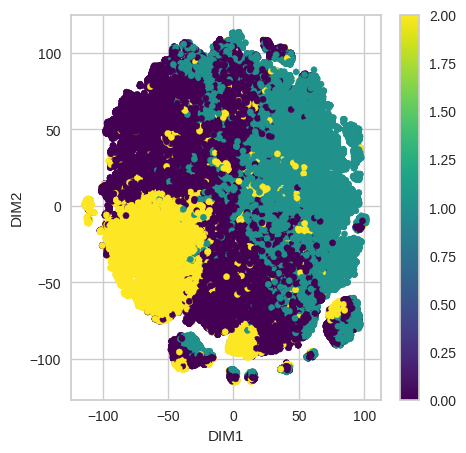

In [578]:
df_tsne2.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), c=clusters, cmap='viridis')

In [579]:
tsne2.kl_divergence_

3.180715799331665

In [580]:
tsne3 = TSNE(n_components=3, init='pca', perplexity=45, random_state=0, n_jobs=-1)
array_tsne3 = tsne3.fit_transform(df_transform)

In [581]:
columns = ['DIM' + str(c) for c in range(1, array_tsne3.shape[1]+1, 1)]
df_tsne3 = pd.DataFrame(array_tsne3, index=df.index, columns=columns)
df_tsne3.head()

,DIM1,DIM2,DIM3
0,10.336069,19.865217,15.983835
1,-31.158995,26.813017,2.322505
2,16.073874,32.690887,-18.306540
3,-21.217699,-17.766830,20.028675
4,27.305653,-14.288562,-16.547829


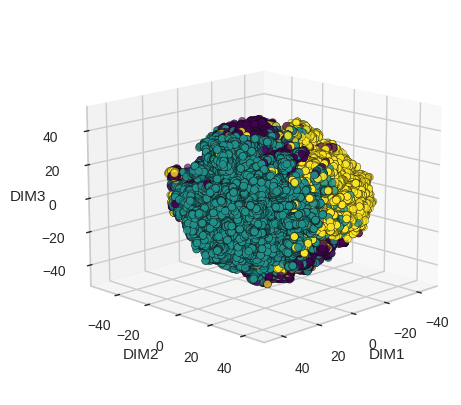

In [584]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_tsne3['DIM1'], df_tsne3['DIM2'], df_tsne3['DIM3'], marker='o', s=30, edgecolor='k', c=clusters, cmap='viridis')
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=45)

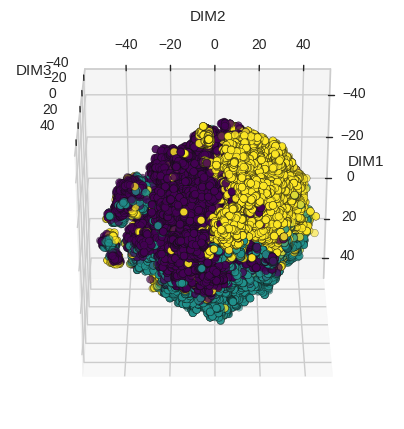

In [595]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_tsne3['DIM1'], df_tsne3['DIM2'], df_tsne3['DIM3'], marker='o', s=30, edgecolor='k', c=clusters, cmap='viridis')
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=120, azim=360)

In [ ]:
tsne3.kl_divergence_

### UMAP

In [599]:
embedding = umap.UMAP(n_components=2, random_state=0, n_jobs=-1)
array_umap = embedding.fit_transform(df_pca)
columns = ['DIM' + str(c) for c in range(1, array_umap.shape[1]+1, 1)]
df_umap = pd.DataFrame(array_umap, index=df_pca.index, columns=columns)

AttributeError: module 'umap' has no attribute 'UMAP'

In [ ]:
df_umap.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), c=clusters, cmap='viridis')

In [ ]:
embedding = umap.UMAP(n_components=3, random_state=0, n_jobs=-1)
X_umap = embedding.fit_transform(df_pca)
columns = ['DIM' + str(c) for c in range(1, X_umap.shape[1]+1, 1)]
X_umap = pd.DataFrame(X_umap, index=df_pca.index, columns=columns)

In [572]:
df['cluster']=clusters
df_cluster = df.groupby('cluster').mean().reset_index()
df_cluster

/tmp/ipykernel_69893/704776513.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cluster = df.groupby('cluster').mean().reset_index()


,cluster,nb_order,price,freight_value,product_photos_qty,product_weight_g,dimension,product_name_description_lenght,review_score,nb_char_comment,payment_sequential,payment_installments,order_estimated_delivery_days,distance,recense
0,0,1.030627,72.065277,17.270098,2.111969,541.531026,5789.457211,759.100547,4.094882,27.049750,1.025069,2.088386,25.710679,722.664300,378.154781
1,1,1.043870,222.871012,29.705579,2.340251,4781.092227,31231.745177,957.484776,4.008256,34.255823,1.015503,4.404240,25.953650,736.348681,377.191704
2,2,1.024598,78.985667,10.225549,2.405080,937.736698,8648.462627,840.044891,4.295740,26.794906,1.015844,2.106252,13.492084,86.295076,304.460049


In [604]:
import plotly.graph_objects as go

# Créer une figure en radar pour chaque cluster
fig = go.Figure()

for cluster, row in df_cluster.iterrows():
    values = row.values.tolist()

    

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=df_cluster,
        fill='toself',
        name=f'Cluster {cluster}'
    ))

# Mettre en forme la figurenum_cols,
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0,5]
        ),
    ),
    showlegend=True,
    width=780,
    height=780

)

# Afficher la figure
fig.show()
figsize = (60,60)

In [607]:
# for line, col in enumerate(df_cluster.columns):
#     sns.barplot(x=df_cluster.index, y=df_cluster.iloc[:, line])
#     plt.show()

In [609]:
# for col in df.select_dtypes('object').columns:
#     sns.countplot(data=df, x=col, hue='cluster')
#     plt.xticks(rotation=75)
#     plt.legend()
#     plt.show()

In [612]:
# def analyse_cluster(df):
#     col_cat = df.select_dtypes('object').columns

#     for col in col_cat:
#         indexs = []
#         valeurs = []

#         for cat in df[col].unique():
#             indexs.append(df[df[col] == cat][col].value_counts().index[0])
#             valeurs.append(df[df[col] == cat][col].value_counts().values[0])

#         sns.barplot(x=indexs, y=valeurs, order = df[col].value_counts().index)
#         plt.xticks(rotation=90)
#         plt.show()

#     col_num = df.select_dtypes('float').columns
#     for col in col_num:
#         sns.distplot(df[col])
#         plt.xlabel(col)
#         plt.xticks(rotation=90)
#         plt.show()

In [614]:
# for i in range(df['cluster'].nunique()):
    # analyse_cluster(df[df['cluster']==i])

In [618]:
# gaussianM = GaussianMixture(n_components=2, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=10, n_init=10, init_params='k-means++', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
# clusters = gaussianM.fit_predict(df_transform)